# Data Handling in Python Workshop | FAS Research Computing
#### Instructor: Mahmood M. Shad | FAS Research Computing 
#### Date: 04/1/2021

#### Resources:
- [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
- [Parallel Computing on FASRC CANNON Cluster](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)

## List of Topics
- Python Data Types: Collections
- File I/O
- Parallel Data Processing

### Python Data Types: Collections
#### List Comprehensions

In [1]:
# Build sequences from other sequences

l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%time res1 = [ x**2 for x in l if isinstance(x, int) ]

# x**2                       :: output expression
# x                          :: variable
# l                          :: input sequence
# if isinstance(x, int)      :: optional predicate


# NOTE: Same results by map, filter, lambda
# lambda(variable : equation, list)

%time res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


print(res1 == res2)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 13.1 µs
CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 13.8 µs
True


Please Note:   
**Wall time** means that a clock hanging on a wall outside of the computer would measure X ms from the time the code was submitted to the CPU to the time when the process completed.

**User time** and sys time both refer to time taken by the CPU to actually work on the code. The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

**User time** is the amount of CPU time taken outside of the kernel.

**Sys time** is the amount of time taken inside of the kernel. 

**Total** CPU time is user time + sys time.

In [2]:
# %timeit vs %time
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

%timeit res1 = [ x**2 for x in l if isinstance(x, int) ]
%timeit res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))


2.23 µs ± 50.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.34 µs ± 56.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
%%time

print("time the whole cell using %%time built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

time the whole cell using %%time built-in function
True
CPU times: user 378 µs, sys: 344 µs, total: 722 µs
Wall time: 459 µs


In [4]:
%%prun

print("profile the whole cell using %%prun built-in function")
l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

res1 = [ x**2 for x in l if isinstance(x, int) ]
res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
print(res1 == res2)

profile the whole cell using %%prun built-in function
True
 

**ncalls** : the number of calls,

**tottime** : the total time spent in the given function (and excluding time made in calls to sub-functions),

**percall** : the quotient of *tottime* divided by *ncalls*

**cumtime** : the total time spent in this and all subfunctions (from invocation till exit). This figure is accurate even for recursive functions.

**percall** is the quotient of *cumtime* divided by primitive calls

**NOTE:** Read more about the built-in magic commands in `IPython` [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 

In [19]:
# Load an IPython extension by its module name.
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [20]:
def test():
    l = [1, '4', 9, 'a', 0, 4, 'b', '5', 11, 'aa', 'bb', 7]

    res1 = [ x**2 for x in l if isinstance(x, int) ]
    res2 = list(map(lambda x: x**2, filter(lambda x: isinstance(x, int), l)))
    print(res1 == res2)

In [21]:
%snakeviz test()

True
 
*** Profile stats marshalled to file '/var/folders/_c/6tgj_rc57nv5066769brrsym0000gn/T/tmpki64l68s'. 
Embedding SnakeViz in this document...


In [22]:
%%time

# Nested Comprehensions
[ [ 1 if i == row_i else 0 for i in range(0, 10) ] for row_i in range(0, 10) ]

# Use zip() to work with two or more elements at a time
[(v,w) for v,w in zip([1,2,3], [4,5,6])]

CPU times: user 58 µs, sys: 2 µs, total: 60 µs
Wall time: 63.9 µs


[(1, 4), (2, 5), (3, 6)]

#### Set Comprehensions
Similar to list comprehensions but it outputs sets.

In [23]:
l = [1, 4, 9, 'aa', 0, 4, 'bb', 5, 5, 'aa', 'bb', 1]
res = {i for i in l}
print(res)

{0, 1, 4, 5, 9, 'bb', 'aa'}


#### Dictionary Comprehensions
Similar to list comprehensions but it outputs dictionaries.

In [24]:
# Get frequency of keys and ignore lowercase/uppercase
d = {'b':20, 'c': 40, 'B': 50, 'Z':30}

d_freq = { i.lower() : d.get(i.lower(), 0) + d.get(i.upper(), 0) for i in d.keys() }

print(d)
print(d_freq)

{'b': 20, 'c': 40, 'B': 50, 'Z': 30}
{'b': 70, 'c': 40, 'z': 30}


#### Function map(), apply(), applymap()

In [27]:
def xsq(x):
    return x**2

l1 = [i for i in range(10**5)]

%time list(map(xsq, l1))
%time list(map(lambda x: x**2, l1))


l2 = ['cat', 'dog', 'bird', 'horse']
print(list(map(list,l2)))

CPU times: user 30.7 ms, sys: 1.53 ms, total: 32.3 ms
Wall time: 31.6 ms
CPU times: user 28.6 ms, sys: 418 µs, total: 29 ms
Wall time: 29.1 ms
[['c', 'a', 't'], ['d', 'o', 'g'], ['b', 'i', 'r', 'd'], ['h', 'o', 'r', 's', 'e']]


In [31]:
# dataframe map
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
del df['species']

f = lambda x: x.max() - x.min()
format = lambda x: '%.2f' % x

# map() function
%time print ( pd.Series(map(format, df['sepal_length'])) ) 

# map works element-wise on a series
%time print( df['sepal_length'].map(format) )

# applymap works element-wise on a dataframe
%time print ( df.applymap(format) )

# apply works on row/column basis
%time print ( df.apply(f, axis=0) )    # 0: column, 1: row

0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Length: 150, dtype: object
CPU times: user 1.31 ms, sys: 228 µs, total: 1.53 ms
Wall time: 1.61 ms
0      5.10
1      4.90
2      4.70
3      4.60
4      5.00
       ... 
145    6.70
146    6.30
147    6.50
148    6.20
149    5.90
Name: sepal_length, Length: 150, dtype: object
CPU times: user 1.42 ms, sys: 390 µs, total: 1.81 ms
Wall time: 1.93 ms
    sepal_length sepal_width petal_length petal_width
0           5.10        3.50         1.40        0.20
1           4.90        3.00         1.40        0.20
2           4.70        3.20         1.30        0.20
3           4.60        3.10         1.50        0.20
4           5.00        3.60         1.40        0.20
..           ...         ...          ...         ...
145         6.70        3.00         5.20        2.30
146         6.30        2.50         5.00        1.90
147         6.50        3.00    

Output()

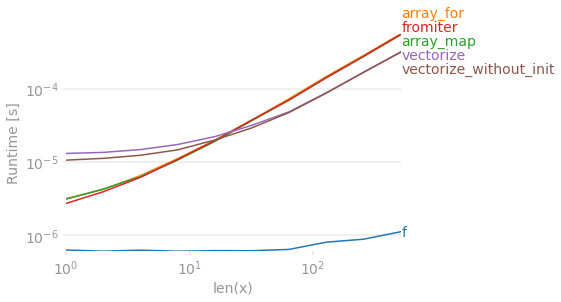

In [32]:
# Example on numpy array

import numpy as np
import perfplot
import math

def f(x):
    # return math.sqrt(x)
    return np.sqrt(x)

vf = np.vectorize(f)

def array_for(x):
    return np.array([f(xi) for xi in x])

def array_map(x):
    return np.array(list(map(f, x)))

def fromiter(x):
    return np.fromiter((f(xi) for xi in x), x.dtype)

def vectorize(x):
    return np.vectorize(f)(x)

def vectorize_without_init(x):
    return vf(x)

perfplot.show(
    setup=lambda n: np.random.rand(n),
    n_range=[2 ** k for k in range(10)],
    kernels=[f, array_for, array_map, fromiter, vectorize, vectorize_without_init],
    xlabel="len(x)",
)

#### Iterators & Generators

In [20]:
# Iterators

l = [1, 20, 3, 40, 5, 60]
it = iter(l)

print( next(it) )
print( it.__next__() )

1
20


In [37]:
# Generators
import random
import time

def lot():
    for i in range(4):
        yield random.randint(100, 200)
        time.sleep(2)
        

for r in lot():
       print("Next random number is: %d" %(r))

Next random number is: 192
Next random number is: 126
Next random number is: 184
Next random number is: 150


### I/O Operation
We want efficiency and flexibility in I/O operations!
- Pickle (serialized storage)
- I/O on Text
- SQL Database
- PyTables I/O Operations

#### Pickle :: Serialized storage

In [39]:
# pickle module serializes the python object for faster r/w.
import pickle
import numpy as np
from random import gauss

dat1 = [gauss(1.5, 2) for i in range(1000000)]

file = open("ser_data.pkl", 'wb')

# data variable is serialized to a "byte stream" and dumped to disk
%time pickle.dump(dat1, file)

# retrieving deserialized data from pickle file
%time dat2 = pickle.load(open( "ser_data.pkl", "rb" ))

np.allclose(np.array(dat1), np.array(dat2), rtol=1e-05, atol=1e-08)  # relative / absolute

CPU times: user 22.3 ms, sys: 7.87 ms, total: 30.1 ms
Wall time: 31 ms
CPU times: user 35.5 ms, sys: 15.4 ms, total: 50.9 ms
Wall time: 51.5 ms


True

In [41]:
%%time
with open('nonser_data.dat', 'w') as f:
    for item in dat1:
        f.write("%s\n" % item)

CPU times: user 824 ms, sys: 18 ms, total: 842 ms
Wall time: 863 ms


#### I/O on Text
Pandas library is preferred over built-in Python commands for text data processing.  
Formats: JSON, SQL, CSV, XLS/XLSX, HTML

In [49]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

%time df.to_csv('csvdata.csv')

# And to read the files back from the disk
%time dat3 = pd.read_csv('csvdata.csv')

CPU times: user 1.49 ms, sys: 556 µs, total: 2.04 ms
Wall time: 2.16 ms
CPU times: user 2.05 ms, sys: 256 µs, total: 2.31 ms
Wall time: 3.03 ms


#### SQL Database
Python supports both SQL and NoSQL databases. It support SQL through its SQLite3.

In [50]:
import sqlite3 as sq

# Creating table
query = 'CREATE TABLE TEST_TABLE (N1 real, N2 real, N3 real)'
con = sq.connect('test_sqldb.db')
con.execute(query)
con.commit()

In [55]:
%%time

# Saving data 
data = np.random.standard_normal((1000000, 3))

con.executemany('INSERT INTO TEST_TABLE VALUES (?, ?, ?)', data)
con.commit()

CPU times: user 3.71 s, sys: 65.3 ms, total: 3.77 s
Wall time: 3.79 s


In [56]:
%%time
# Reading data is faster
con.execute('SELECT * FROM TEST_TABLE').fetchall()[0]

CPU times: user 3.2 s, sys: 352 ms, total: 3.55 s
Wall time: 3.55 s


(0.8591495329257454, -1.139937944645096, -1.0270384279213154)

In [57]:
%%time
# Save directly to Numpy
np_query = 'SELECT * FROM TEST_TABLE WHERE N1 > 0 AND N2 < 0'
np.array(con.execute(np_query).fetchall()).round(3)[0]

CPU times: user 1.8 s, sys: 119 ms, total: 1.92 s
Wall time: 1.92 s


array([ 0.859, -1.14 , -1.027])

In [58]:
# load data directly to Pandas data format
import pandas.io.sql as pds
df = pds.read_sql('SELECT * FROM TEST_TABLE', con)

# Much faster with Pandas in-memory processing
%time df[(df['N1'] > 0) & (df['N2'] < 0)].head()

# NOTE: Pandas CANNOT completely replaces SQL.

CPU times: user 59.5 ms, sys: 26.9 ms, total: 86.4 ms
Wall time: 468 ms


,N1,N2,N3
0,0.859150,-1.139938,-1.027038
7,1.019990,-0.579416,-2.302068
9,1.421544,-0.113872,0.786747
10,1.491558,-0.948897,-0.999597
13,1.683391,-0.021800,0.018720


#### PyTables I/O Operations
PyTables is a Python binding for the HDF5 format.

In [59]:
import tables as tb
file = 'tab.h5'
h5 = tb.open_file(file, 'w')

# creating rows for the db
rows = 2000000
table_model = { 'N1': tb.IntCol(pos=1), 'N2': tb.IntCol(pos=2) }
filters = tb.Filters(complevel=0)  # no compression 
table = h5.create_table('/', 'ints', table_model, title='Integers', expectedrows=rows, filters=filters)

print(table)

/ints (Table(0,)) 'Integers'


In [60]:
%%time
# populate table with random numbers
ran_int = np.random.randint(0, 10000, size=(rows, 2))

pointer = table.row              # get a pointer to the Row
for i in range(rows):
  pointer['N1'] = ran_int[i, 0]
  pointer['N2'] = ran_int[i, 1]
  pointer.append()               # append data and move pointer one row
table.flush()

print(table)

/ints (Table(2000000,)) 'Integers'
CPU times: user 1.4 s, sys: 14.9 ms, total: 1.42 s
Wall time: 1.42 s


In [61]:
%%time

# Using Numpy structured array   :: FASTER
dty = np.dtype([('N1', 'i4'), ('N2', '<i4')])
sarray = np.zeros(len(ran_int), dtype=dty)

h5.create_table('/', 'np_array', sarray, title='Integers', expectedrows=rows, filters=filters)
print(h5)

tab.h5 (File) ''
Last modif.: 'Fri Apr  1 03:01:53 2022'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'
/np_array (Table(2000000,)) 'Integers'

CPU times: user 6.74 ms, sys: 5.47 ms, total: 12.2 ms
Wall time: 10.6 ms


In [62]:
# delete duplicate table

h5.remove_node('/', 'np_array')
print(h5)

tab.h5 (File) ''
Last modif.: 'Fri Apr  1 03:02:09 2022'
Object Tree: 
/ (RootGroup) ''
/ints (Table(2000000,)) 'Integers'



In [63]:
# close it before re-opening again
h5.close()

**NOTE**: Pandas and PyTables are optimized speed for **I/O** operations.

**Question**: When I should use `SQL databases` over `NumPy ndarray-based` or `pandas DataFrame-based` methods?


### Parallel Processing
Python packages such as Numpy, Scipy and Pandas utilize `OpenMP` to run on multiple CPUs on a shared-memory space.

- **`-N`**: number of Nodes
- **`--ntasks` or `n`**: number of instances of your command being executed (number of MPI ranks for a common cluster)
- **`--cpus-per-task` or `c`**: how many CPU cores each task can use, *${SLURM_CPUS_PER_TASK}*

Parallel Job Categories:
- Fine grained
- Coarse grained
- Embarrassingly Parallel

Terms:
- **MPI**      : multiple CPU cores in same/different nodes working independently and communicating on demand
- **Threads**  : Python libraries using mulithreading :: Numpy, Scipy, Pandas
- **Tasks**    : Processing too many data files :: csv, HDF5

In [64]:
# Get # of CPU cores per task

%env SLURM_CPUS_PER_TASK

UsageError: Environment does not have key: SLURM_CPUS_PER_TASK


In [65]:
import os
from time import time
import numpy as np

print('Using %d processors' % int(os.getenv('SLURM_CPUS_PER_TASK',1)))

nrounds = 5

t_start = time()

for i in range(nrounds):
    a = np.random.random([2000,2000])
    a = a + a.T
    b = np.linalg.pinv(a) # compute (Moore-Penrose) pseudo-inverse of a matrix

t_delta = time() - t_start

print('Seconds taken to invert %d symmetric 2000x2000 matrices: %f' % (nrounds, t_delta))

Using 1 processors
Seconds taken to invert 5 symmetric 2000x2000 matrices: 13.882356


In [ ]:
!python python_openmp.py

#### Array Job SLURM Script

[More Information](https://docs.rc.fas.harvard.edu/kb/parallel-computing-on-odyssey/)